# Préparez des données pour un organisme de santé publique

<img src="img/oc.png" width="300" height="300"/>

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as st

from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from utils import *

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

**The data information and description** can be found on the OpenFoodData website: [OpenFood](https://world.openfoodfacts.org/)
    


## Importation des données

In [3]:
df = pd.read_csv('data/fr_openfoodfacts_products.csv', sep = '\t', encoding='utf-8', decimal='.', low_memory=False)
#df = data.copy()
df.head(5)

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [4]:
# quantité des données
print('Les quantité des données')
df.shape

# regarder les type des variable
print('Les type observé pour chaque variable')
df.dtypes

print('Conté les type des variables')
df.dtypes.value_counts()

Les quantité des données


(320772, 162)

Les type observé pour chaque variable


code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

Conté les type des variables


float64    106
object      56
dtype: int64

- **Lignes et colonnes**: 320772, 162
- **Types des variables**: qualitative: 56 quantitative: 106

## Filtering data. Cleaning data. Choosing an application.

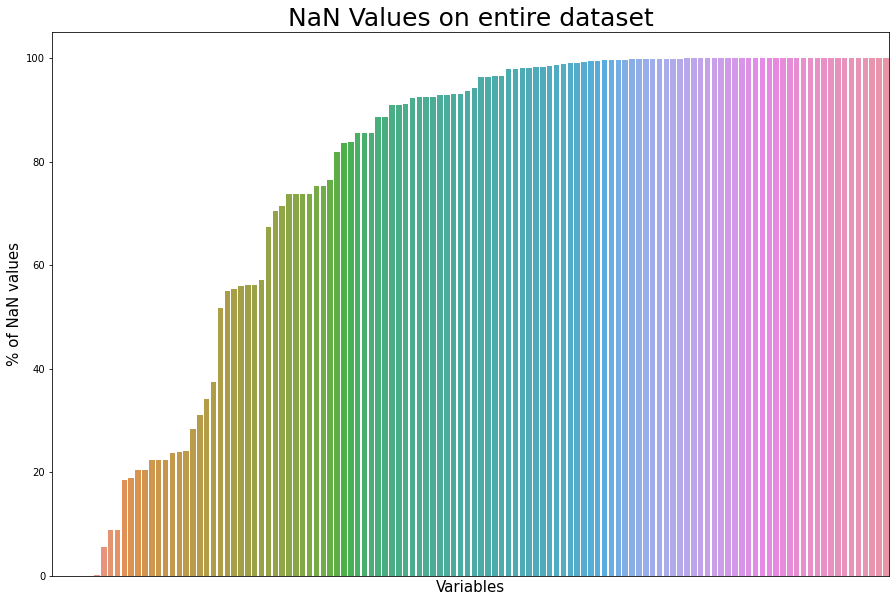

In [5]:
# verifié les valeurs manquants en affichant le pourcentage
dd = df.isna().mean().sort_values(ascending=True)*100
#plt.figure(figsize=(15, 10));
fig = plt.figure(figsize=(15, 10));
axes = sns.barplot(x=dd.values, y=dd.index, data=dd);
axes.set_xticks([]);
axes.set_yticks([0, 20, 40, 60, 80, 100]);
plt.title('NaN Values on entire dataset',fontsize=25);
plt.xlabel('Variables',fontsize=15);
plt.ylabel('% of NaN values',fontsize=15);
del dd;

***Ouufff!!!***
- 162 variables with lots of NaNs! We should try find an application and select the variables that we need!
- first for more clarity, we can see the variables that are less then 40% of NaNs.

In [6]:
var_verify = (df.isna().mean() < 0.4)
#var_verify.index
columns40 = list(df.columns[var_verify])

# Choose the application idea and filter the data:

***Choose your food***

## Description of the problem:
Each of us has it's own preferences of food. Someone are interested in meat/fish, other are looking for cheese, some are looking for some drinks. And of caurse, to mentain us helthy, we want to choose the best food.
But the hole variety of theese foods with lots of nutrition facts makes difficult to make a good selection.

Some nutrition facts and information in coosing the food:
- When we eat and drink more calories than we use up, our bodies store the excess as body fat. If this continues, over time we may put on weight.
- Fats are essential to give your body energy and to support cell function. They also help protect your organs and help keep your body warm. Fats help your body absorb some nutrients and produce important hormones, too.
- Carbohydrates are your body's main source of energy: They help fuel your brain, kidneys, heart muscles, and central nervous system. For instance, fiber is a carbohydrate that aids in digestion, helps you feel full, and keeps blood cholesterol levels in check.
- Sugars higher blood pressure, inflammation, weight gain, diabetes, and fatty liver disease — are all linked to an increased risk for heart attack and stroke.
- The human body requires a small amount of sodium to conduct nerve impulses, contract and relax muscles, and maintain the proper balance of water and minerals. It is estimated that we need about 500 mg of sodium daily for these vital functions.

We need to take control on the foods we are eating. So one can need to gain more in energy having a active life. Other need to eat less fat foods having a not active life, like having a seated job. Others having some desises can be imposed/limited on eating foods conaind some nutritions like sugar/salt/additives. 
 
In my data analyse project I propose to analyse the nutrition food facts, and porpose an application to help the user understand the food nutrition facts, and make a decision
on the desired food.

***This are the most important features for our first data analysis, even that there exists other important variables in dataset.
We use the folowing features in order to indentify the product***
1. Product information:
   - `code`
   - `creator`
   - `brands`
   - `product_name`
   - `countries_fr`
   - `ingredients_text`
   - `serving_size`
   - `additives_n`
   - `ingredients_from_palm_oil_n`                
   - `ingredients_that_may_be_from_palm_oil_n`
   - `additives_tags`
   - `pnns_groups_2`
2. The nutritions value used to compute the nutri-score
   - `energy_100g`                                
   - `fat_100g`                                
   - `saturated-fat_100g`                         
   - `carbohydrates_100g`                         
   - `sugars_100g`                                
   - `fiber_100g`                                 
   - `proteins_100g`                              
   - `salt_100g`                                  
   - `sodium_100g`
   - `fruits-vegetables-nuts_100g`
3. The nutri score
   - `nutrition_grade_fr`
   - `nutrition-score-fr_100g`
   - `nutrition-score-uk_100g`
   


In [7]:
selected_columns = []

if 'fruits-vegetables-nuts_100g' not in columns40:
    columns40.append('fruits-vegetables-nuts_100g') # needed to compute the nutri-score

if 'pnns_groups_2' not in columns40:
    columns40.append('pnns_groups_2') # need to get categories

for c in columns40:
    if not(c.endswith('_datetime')) and not(c.endswith('_t')) and not(c.endswith('_tags')):
        selected_columns.append(c)

if 'additives_tags' not in selected_columns:
    selected_columns.append('additives_tags')
    
if 'additives' in selected_columns:
    selected_columns.remove('additives')

df_selected = df[selected_columns];

## Elimination des colonnes inutiles

In [8]:
cols_to_delete = ['states', 'states_fr', 'countries', 'url'] # 'nutrition-score-uk_100g'

for c in cols_to_delete:
    if c in df_selected.columns:
        df_selected.drop(c, inplace=True, axis=1)
    

/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# quantité des données
print('Les quantité des données')
df_selected.shape

# regarder les type des variable
print('Les type observé pour chaque variable')
df_selected.dtypes

print('Conté les type des variables')
df_selected.dtypes.value_counts()

Les quantité des données


(320772, 25)

Les type observé pour chaque variable


code                                        object
creator                                     object
product_name                                object
brands                                      object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                                  float64
sodium_100g                    

Conté les type des variables


float64    15
object     10
dtype: int64

## Visualisation des données

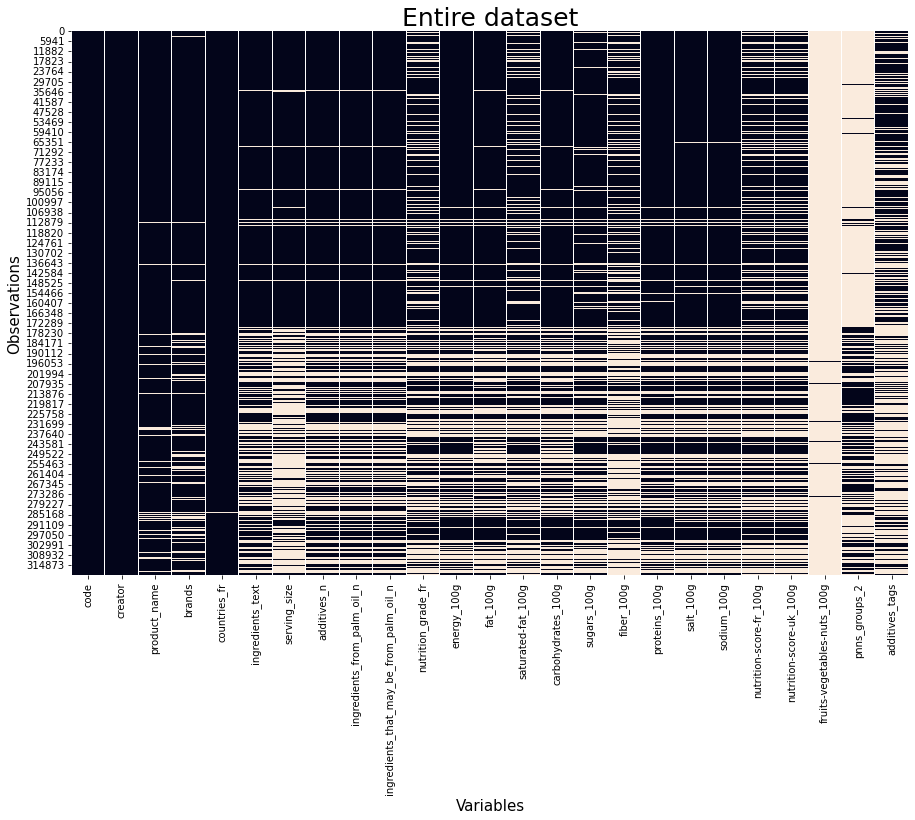

In [10]:
plot_data(df_selected)

In this data plot we observe lots of NaNs, however less columns are selected and data analysis can be done. 

First we start with a data description in order to better understand the data.

## Describing data

In [11]:
df_selected.describe()

additives_n  ingredients_from_palm_oil_n  \
count  248939.000000                248939.000000   
mean        1.936024                     0.019659   
std         2.502019                     0.140524   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g       fat_100g  \
count                            248939.000000  2.611130e+05  243891.000000   
mean                                  0.055246  1.141915e+03      12.730379   
std                                   0.269207  6.447154e+03      17.578747   
min                                   0.000000  0.000000e+00       0.000000   
25%                                   0.000000  3.770000e+02       0.000000   
50%                                   0.000000  1.100000e+03       5.000000   
75%                                   0.000000  1.674000e+03      20.000000   
max                                   6.000000  3.251373e+06     714.290000   

       saturated-fat_100g  carbohydrates_100g    sugars_100g     fiber_100g  \
count       229554.000000       243588.000000  244971.000000  200886.000000   
mean             5.129932           32.073981      16.003484       2.862111   
std              8.014238           29.731719      22.327284      12.867578   
min              0.000000            0.000000     -17.860000      -6.700000   
25%              0.000000            6.000000       1.300000       0.000000   
50%              1.790000           20.600000       5.710000       1.500000   
75%              7.140000           58.330000      24.000000       3.600000   
max            550.000000         2916.670000    3520.000000    5380.000000   

       proteins_100g      salt_100g    sodium_100g  nutrition-score-fr_100g  \
count  259922.000000  255510.000000  255463.000000            221210.000000   
mean        7.075940       2.028624       0.798815                 9.165535   
std         8.409054     128.269454      50.504428                 9.055903   
min      -800.000000       0.000000       0.000000               -15.000000   
25%         0.700000       0.063500       0.025000                 1.000000   
50%         4.760000       0.581660       0.229000                10.000000   
75%        10.000000       1.374140       0.541000                16.000000   
max       430.000000   64312.800000   25320.000000                40.000000   

       nutrition-score-uk_100g  fruits-vegetables-nuts_100g  
count            221210.000000                  3036.000000  
mean                  9.058049                    31.458587  
std                   9.183589                    31.967918  
min                 -15.000000                     0.000000  
25%                   1.000000                     0.000000  
50%                   9.000000                    23.000000  
75%                  16.000000                    51.000000  
max                  40.000000                   100.000000

 - the mean with standart deviation, the minimum and the maximum values and the quantiles are observed for the numerical variables. We can easly observe the outliers in the maximum and minimum values. These should be treated in future.

In [12]:
df_selected.describe(include=[object])

code          creator product_name     brands countries_fr  \
count          320749           320770       303010     292360       320492   
unique         320749             3535       221347      58784          722   
top     0076737119056  usda-ndb-import    Ice Cream  Carrefour   États-Unis   
freq                1           169868          410       2978       172998   

                         ingredients_text      serving_size  \
count                              248962            211331   
unique                             205520             25423   
top     Carbonated water, natural flavor.  240 ml (8 fl oz)   
freq                                  222              5496   

       nutrition_grade_fr pnns_groups_2 additives_tags  
count              221210         94491         154680  
unique                  5            42          41537  
top                     d       unknown        en:e322  
freq                62763         22624           8264

 - the count, the unique values, the most used and the frequencies ot the categorical variables can be observed. Here We see that the code is an unique value and it can be ommited in future analysis. However we use it in detecting the duplicates.

In [13]:
# afficher les valeurs unique pour chaque variable
df_selected.nunique()

code                                       320749
creator                                      3535
product_name                               221347
brands                                      58784
countries_fr                                  722
ingredients_text                           205520
serving_size                                25423
additives_n                                    31
ingredients_from_palm_oil_n                     3
ingredients_that_may_be_from_palm_oil_n         7
nutrition_grade_fr                              5
energy_100g                                  3997
fat_100g                                     3378
saturated-fat_100g                           2197
carbohydrates_100g                           5416
sugars_100g                                  4068
fiber_100g                                   1016
proteins_100g                                2503
salt_100g                                    5587
sodium_100g                                  5293


In [14]:
df_selected.isna().mean().sort_values(ascending=True)

creator                                    0.000006
code                                       0.000072
countries_fr                               0.000873
product_name                               0.055373
brands                                     0.088574
energy_100g                                0.185986
proteins_100g                              0.189699
salt_100g                                  0.203453
sodium_100g                                0.203599
ingredients_text                           0.223866
additives_n                                0.223938
ingredients_from_palm_oil_n                0.223938
ingredients_that_may_be_from_palm_oil_n    0.223938
sugars_100g                                0.236308
fat_100g                                   0.239675
carbohydrates_100g                         0.240620
saturated-fat_100g                         0.284370
nutrition_grade_fr                         0.310382
nutrition-score-fr_100g                    0.310382
nutrition-sc

# Data cleaning

## Variables quantitatives

### Elimination des ligne avec `code` NaN

In [15]:
df_selected = df_selected[~df_selected.code.isna()]

### Verification des duplicates par `code`

In [16]:
## verifié les valeurs dupliqué sur le même code
df_selected.duplicated(['code']).sum()

0

### Droping the column `code`

In [17]:
df_selected.drop(['code'], inplace=True, axis=1)

### Effacé des ligne avec le valeur nutritionistes vide

In [18]:
df_selected = df_selected[~(df_selected.energy_100g.isna() & df_selected.proteins_100g.isna() & df_selected.sugars_100g.isna() & df_selected.fat_100g.isna() &
           df_selected['saturated-fat_100g'].isna() & df_selected.fiber_100g.isna() & df_selected.sodium_100g.isna() & df_selected['fruits-vegetables-nuts_100g'].isna())]

### Outliers verifications and corrections

In [19]:
mask = ~((df_selected.fiber_100g<0) | (df_selected.fiber_100g>100) |
         (df_selected.salt_100g<0) | (df_selected.salt_100g>100) |
         (df_selected['proteins_100g']<0) | (df_selected['proteins_100g']>100) |
         (df_selected['sugars_100g']<0) | (df_selected['sugars_100g']>100)
        );
df_selected = df_selected[mask];

In [20]:
# Foods are made up of protein, fat and carbohydrate. Therefore summing them must give us not more then 100g
cols = [
    'proteins_100g',
    'fat_100g',
    'carbohydrates_100g'    
    ]   
df_selected['sum_on_g'] = df_selected[cols].abs().sum(axis=1)
df_selected['is_outlier'] = df_selected.sum_on_g>100
#df_selected.is_outlier.value_counts(normalize = True)

df_selected = df_selected[df_selected.is_outlier==False];

df_selected.drop(['sum_on_g', 'is_outlier'], inplace=True, axis=1);

### Fill NaN
- _100g numerical columns set 0 within nan
- nutrition_grade_fr set from 'a' to 'e' using the knollage from nutrition-score-fr_100g 
- energy_100g - The process of indroducing dataset in OpenFood is difficult and complicated for example in the case of the energy the user that introduced the data could confuse kJ and kcal. Get a computation of energy in kcal for all the values that is 17proteins + 17carbohydrates + 39fat
- filling the additives counting variables also with 0 if it is not speccified

In [21]:
cols = []
for col in df_selected.columns:
    if col.endswith('_100g') & ('nutrition-score' not in col) & ('nutrition-grade' not in col) & (col != 'energy_100g') :
        cols.append(col)
df_selected[cols] = df_selected[cols].fillna(value=0)

In [22]:
# 1 calorie vaut 180/43 soit 4.1860465116 Joules que nous arrondirons à 4,186 Joules.
# 1000 calories = 1 Kilocalorie = 1 kcal
df_selected['energy_100g'] = 17*df_selected.proteins_100g + 17*df_selected.carbohydrates_100g + 39*df_selected.fat_100g

In [23]:
df_selected[~df_selected['additives_tags'].isna() & df_selected['additives_n'].isna()][['additives_n', 'additives_tags']]

Empty DataFrame
Columns: [additives_n, additives_tags]
Index: []

In [24]:
df_selected['additives_n'] = df_selected['additives_n'].fillna(value=0)
df_selected['ingredients_from_palm_oil_n'] = df_selected['ingredients_from_palm_oil_n'].fillna(value=0)
df_selected['ingredients_that_may_be_from_palm_oil_n'] = df_selected['ingredients_that_may_be_from_palm_oil_n'].fillna(value=0)

### View the minimum and maximum of nutriscore

In [25]:
(df_selected['nutrition-score-fr_100g'].min(), df_selected['nutrition-score-fr_100g'].max())

(-15.0, 40.0)

In [26]:
(df_selected['nutrition-score-uk_100g'].min(), df_selected['nutrition-score-uk_100g'].max())

(-15.0, 36.0)

## Variables qualitatives

### Top 5 values creation

In [27]:
take_top_5_col = ['creator', 'countries_fr']
def create_top5(df, col):
    col_5 = col + '_top5'
    ll = list(df[col].value_counts().head(5).index)
    df[col_5] = df[col]
    df.loc[~(df[col_5].isin(ll)),col_5] = 'Autre'

for col in take_top_5_col:
    create_top5(df_selected, col)
    
#df_selected.head()

### Top 10 values creation

In [28]:
take_top_10_col = ['product_name']
def create_top10(df, col):
    col_10 = col + '_top10'
    ll = list(df[col].value_counts().head(10).index)
    df[col_10] = df[col]
    df.loc[~(df[col_10].isin(ll)),col_10] = 'Autre'

for col in take_top_10_col:
    create_top10(df_selected, col)

### Split '.' in variable `ingredients`

 - character that can be found at the end of the `ingredients` (ex: 'water' and 'water.' should be the same)

In [29]:
df_selected['ingredients_text'] = df.ingredients_text.str.split('.', n=1, expand=True)[0];

### Split ':' character in `countries_fr`.`
- characted can be found in the values of `countries_fr` (ex: 'en:Tunisie' and 'Tunisie.' should be the same)

In [30]:
df_selected.countries_fr = df_selected.countries_fr.str.replace('en:', '')
df_selected.countries_fr = df_selected.countries_fr.str.replace('es:', '')
df_selected.countries_fr = df_selected.countries_fr.str.replace('de:', '')
df_selected.countries_fr = df_selected.countries_fr.str.replace('ar:', '')
df_selected.countries_fr = df_selected.countries_fr.str.replace('nl:', '')
df_selected.countries_fr = df_selected.countries_fr.str.replace('xx:', '')


df_selected.loc[(df_selected.countries_fr.str.lower() == 'royaume-uni') | (df_selected.countries_fr.str.lower() == 'Angleterre'), 'countries_fr'] = 'Royaume-Uni'
df_selected.loc[(df_selected.countries_fr.str.lower() == '77-provins') | (df_selected.countries_fr.str.lower() == 'Aix-en-provence'), 'countries_fr'] = 'France'

# Correlation

## Entre 2 variables quantitatives

In [31]:
plot_correlation(df_selected)

In [32]:
st.pearsonr(df_selected.fat_100g, df_selected.energy_100g)[0] # coefficient de correlation lineere
np.cov(df_selected.fat_100g, df_selected.energy_100g, ddof=0) # matrice de covariance 

0.8023789000889111

array([[2.91999772e+02, 1.15335422e+04],
       [1.15335422e+04, 7.07593613e+05]])

## Entre 1 variable quantitative et une variable qualitative (ANOVA)

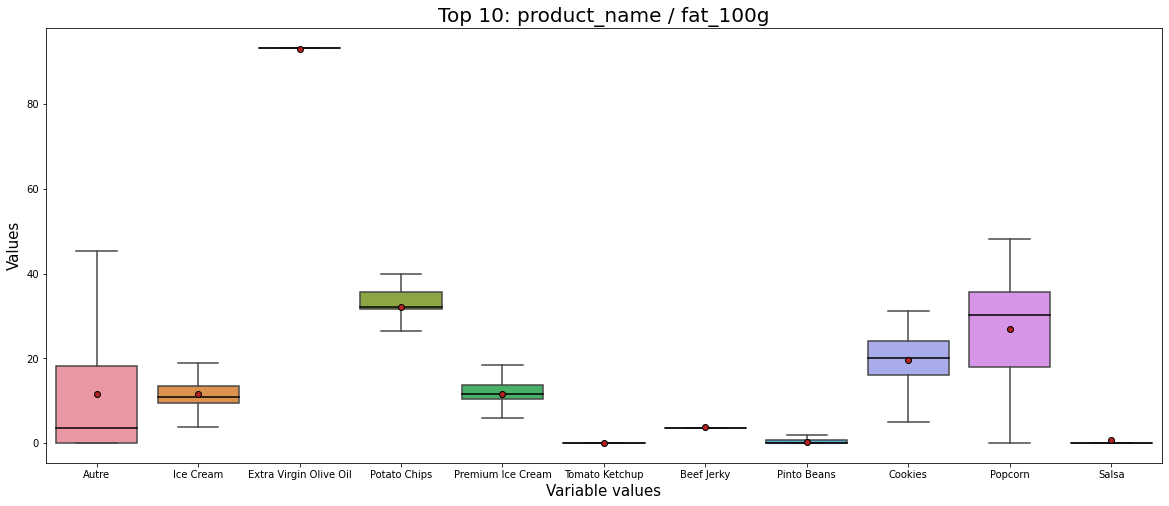

In [33]:
data = get_pandas_catVar_numVar(df_selected, catVar = 'product_name_top10', numVar = 'fat_100g')

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(20,8));
b = sns.boxplot(x="variable", y="value", data=pd.melt(data), showfliers = False,  showmeans=True, medianprops=medianprops, meanprops=meanprops);
plt.title('Top 10: product_name / fat_100g', fontsize=20);
plt.xlabel('Variable values', fontsize=15);
plt.ylabel('Values', fontsize=15);
plt.show();

***Observe:***
- The fat is different from one product to other. 
- For instance the fat for Potato chips, Cookies, Popcorn are bigger and more disperced that thoose of salsa, pinto beans.
- The product that contains the biggest fat is that of Extra Virgin Olive Oil that is logic.

We shal say here that according to our application some of theese products could be omited by our users. For example if we want to eat cookies that have less then 30 fat, that means not all cookies is permited, and thoose will not be selected.

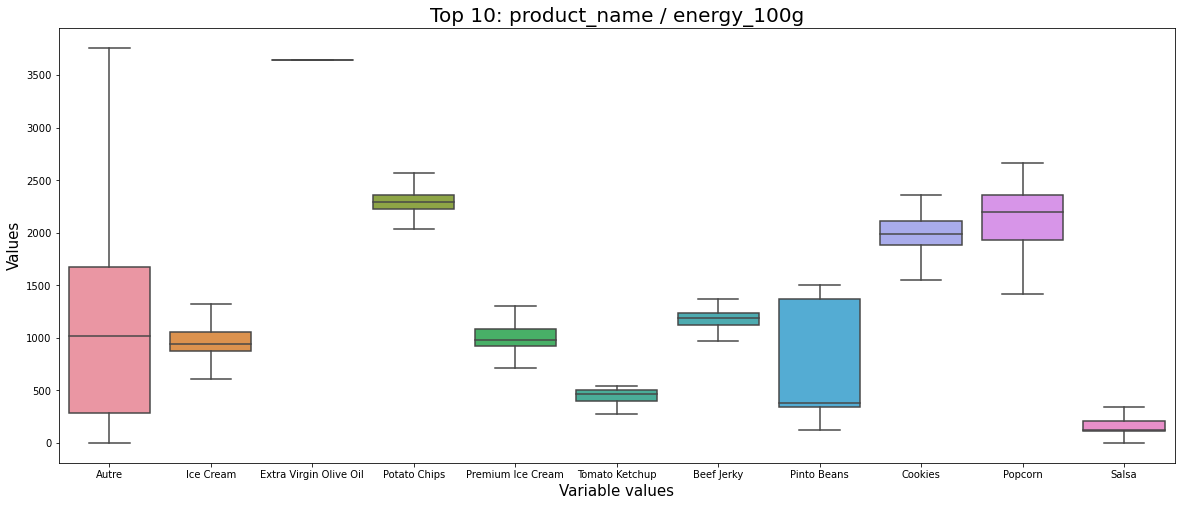

In [34]:
data = get_pandas_catVar_numVar(df_selected, catVar = 'product_name_top10', numVar = 'energy_100g')

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(20,8));
b = sns.boxplot(x="variable", y="value", data=pd.melt(data), showfliers = False);
plt.title('Top 10: product_name / energy_100g', fontsize=20);
plt.xlabel('Variable values', fontsize=15);
plt.ylabel('Values', fontsize=15);
plt.show();

***Observe:***

 - Somehow the energy is similar to the fat. The higher fat producing a higher energy products. However they are more dispersed on energy variable that on fat variable.
 - Having a standing proffesion high caloric products should be evited. For exemple tacking cookies with prefered less kcal for persons with sitting proffession.

Soit Y une variable categorielle et X une variable numerique on regarde les correlation entre ces variables avec eta_squared = Variance_totale/Variance_intraclasse.
Si  eta_squared = 0, cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les variables Y et X. Au contraire, si eta_squared = 1, cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les variables Y et X.

In [35]:
eta_squared(df_selected, 'product_name_top10', 'energy_100g')

0.01549807432414869

In [36]:
eta_squared(df_selected, 'product_name_top10', 'fat_100g')

0.029213633935751313

In [37]:
eta_squared(df_selected[~df_selected.nutrition_grade_fr.isna()], 'nutrition_grade_fr', 'energy_100g')

0.2982499803324353

In [38]:
eta_squared(df_selected[~df_selected.nutrition_grade_fr.isna()], 'nutrition_grade_fr', 'fat_100g')

0.2618975105793521

***Observe:***

    - nutrition grade has a correlation with the fat and energy variables

## Entre 2 variables qualitatives

***Avez vous les même produits dans differents états?***

In [39]:
X = "product_name_top10"
Y = "countries_fr_top5"

cont = df_selected[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

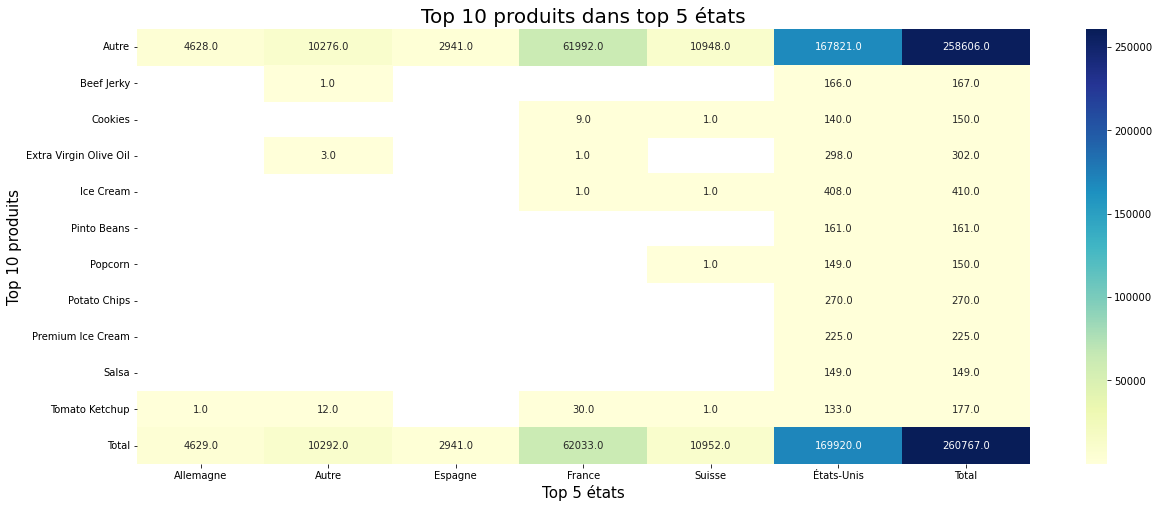

In [40]:
plt.figure(figsize=(20,8));
sns.heatmap(cont, cmap="YlGnBu", annot=True, fmt='.1f')
plt.title('Top 10 produits dans top 5 états', fontsize=20);
plt.xlabel('Top 5 états', fontsize=15);
plt.ylabel('Top 10 produits', fontsize=15);

***Observe:***
 - the top ten products are all observed in the US. 
 - France is on the second place on the observed products.

# Analyse des données

## Analyse univarié
### Densité des variables nutritionelle

/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

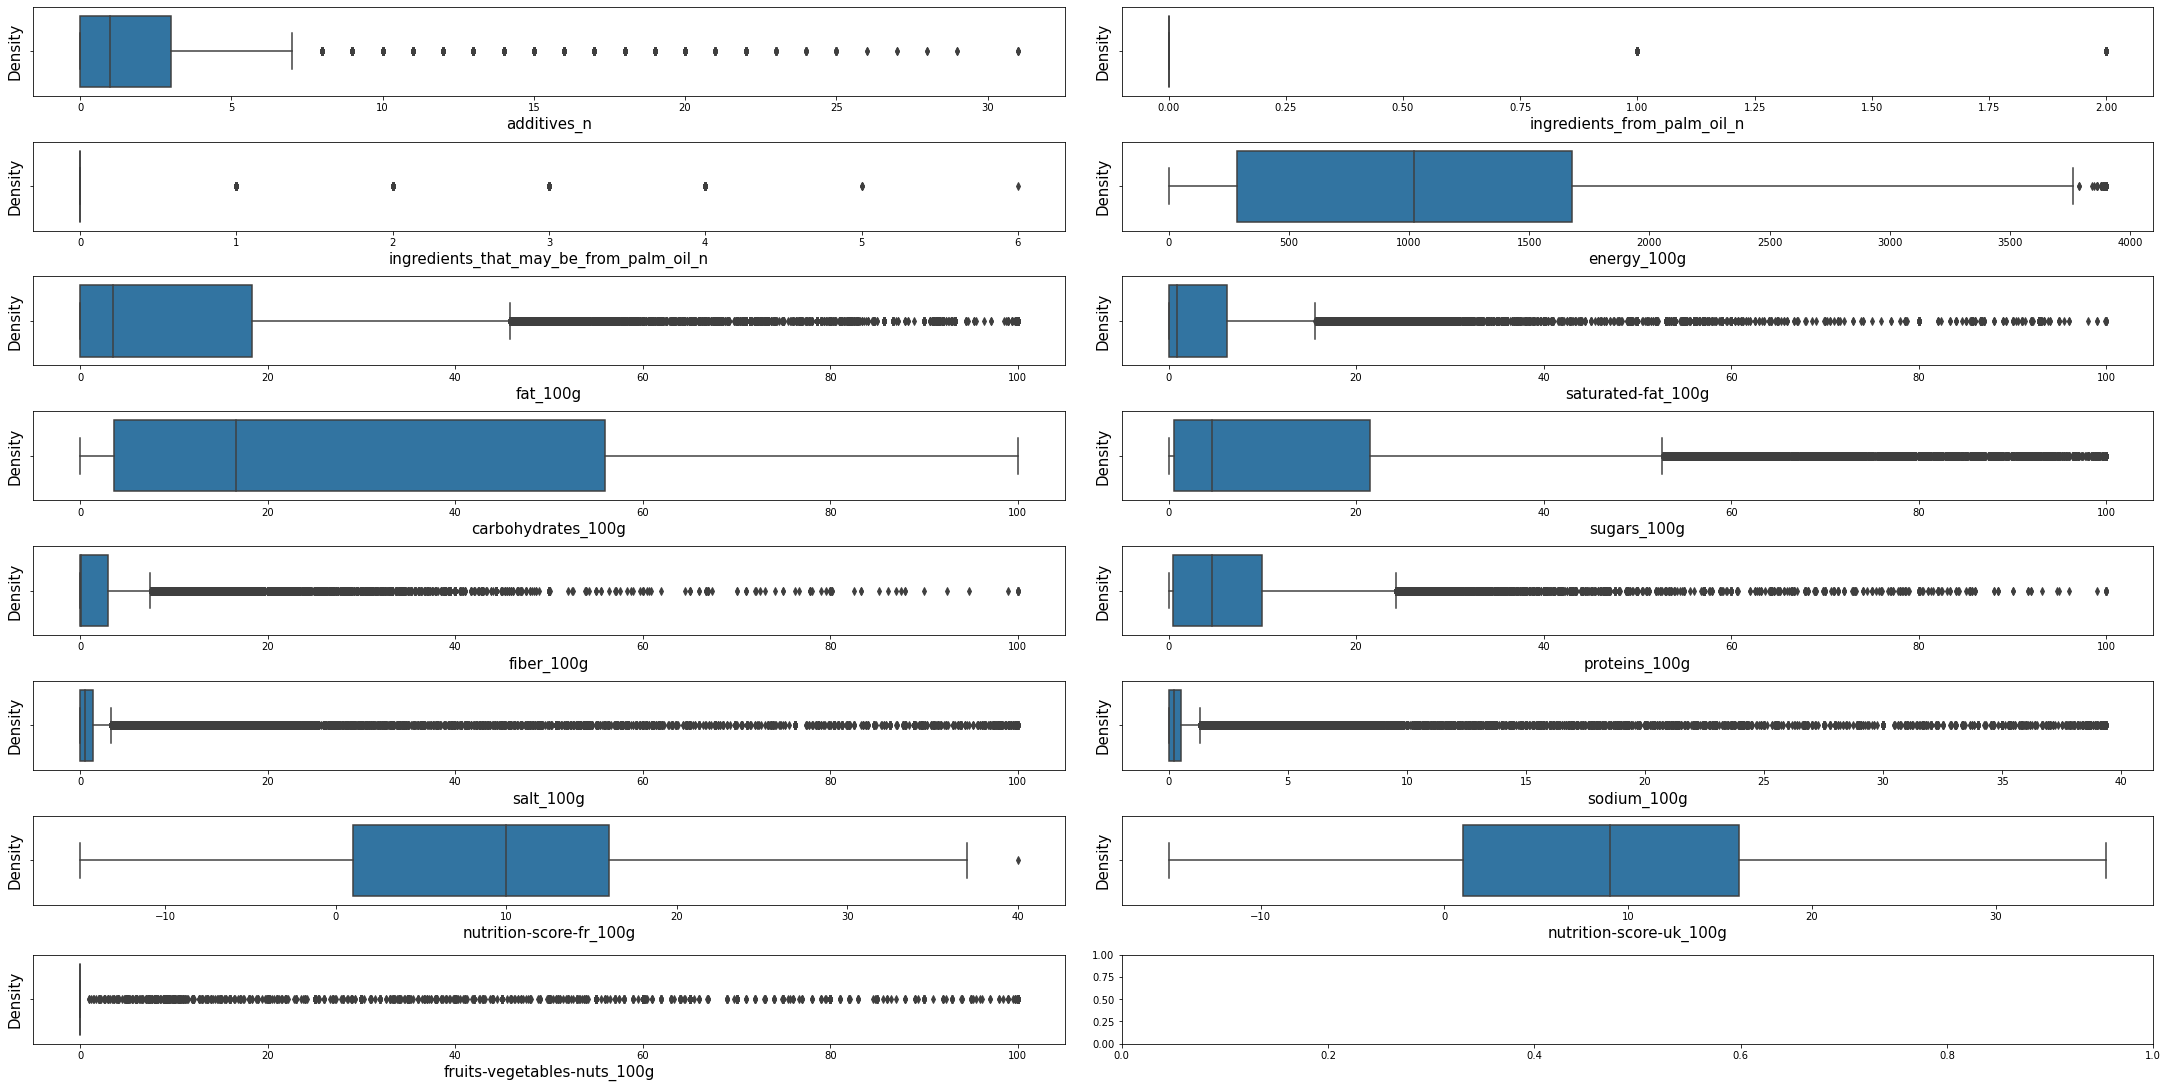

In [50]:
#plot_density(df_selected, dt = DensityTypes.Density)
plot_density(df_selected, dt = DensityTypes.Boxplot)

### Top 5 creators

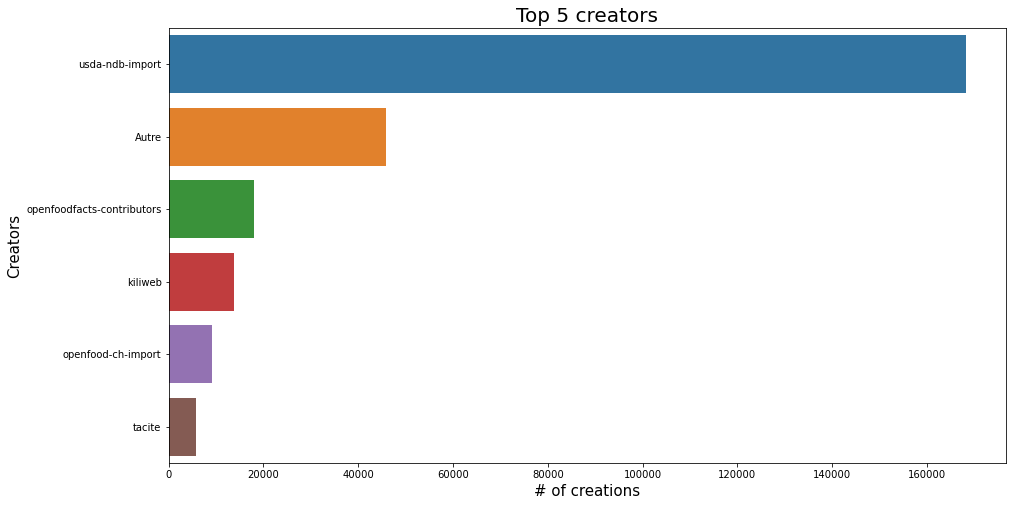

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_selected.creator_top5.value_counts(), y=df_selected.creator_top5.value_counts().index, data=df_selected);
plt.title('Top 5 creators', fontsize=20);
plt.xlabel('# of creations', fontsize=15);
plt.ylabel('Creators', fontsize=15);
plt.show();

### Top 10 produits

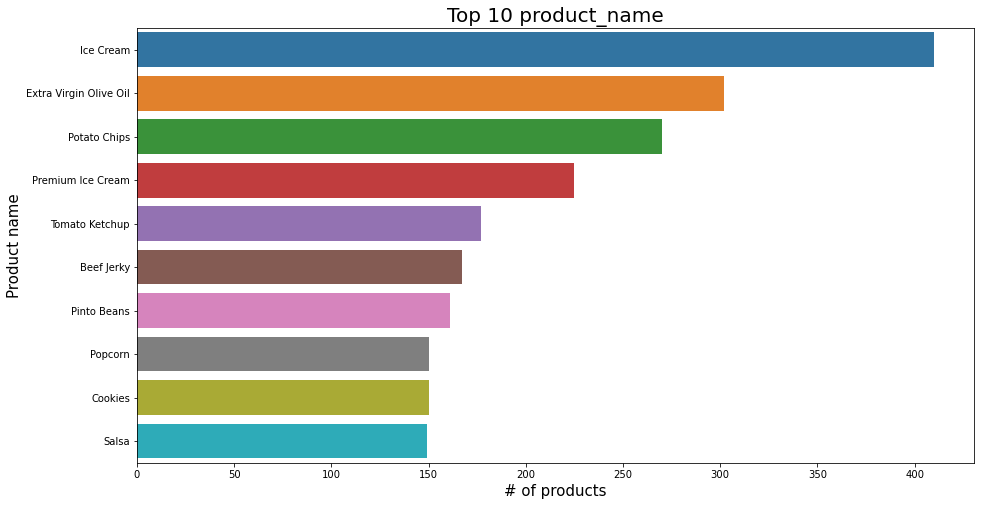

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_selected.product_name.value_counts().head(10), y=df_selected.product_name.value_counts().head(10).index, data=df_selected);
plt.title('Top 10 product_name', fontsize=20);
plt.xlabel('# of products', fontsize=15);
plt.ylabel('Product name', fontsize=15);
plt.show();

### Top 10 brands

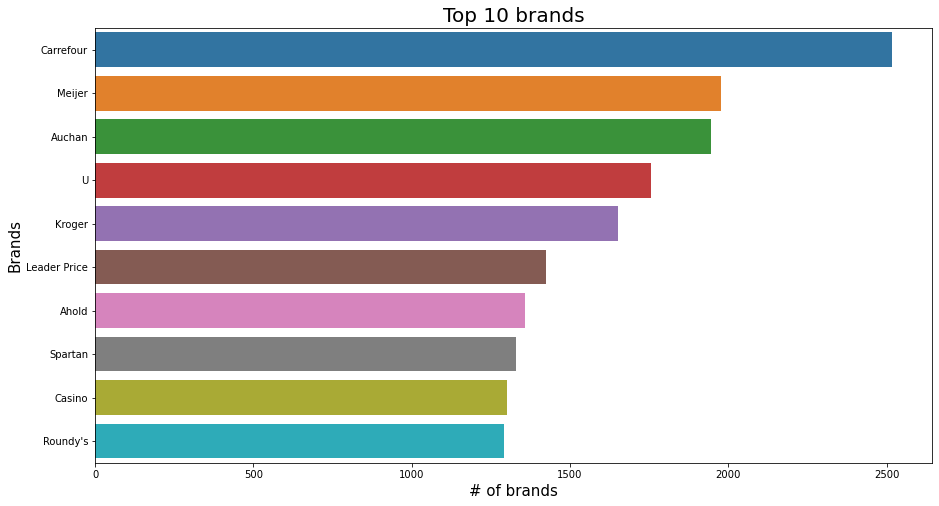

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_selected.brands.value_counts().head(10), y=df_selected.brands.value_counts().head(10).index, data=df_selected);
plt.title('Top 10 brands', fontsize=20);
plt.xlabel('# of brands', fontsize=15);
plt.ylabel('Brands', fontsize=15);
plt.show();

### Top 10 ingredients

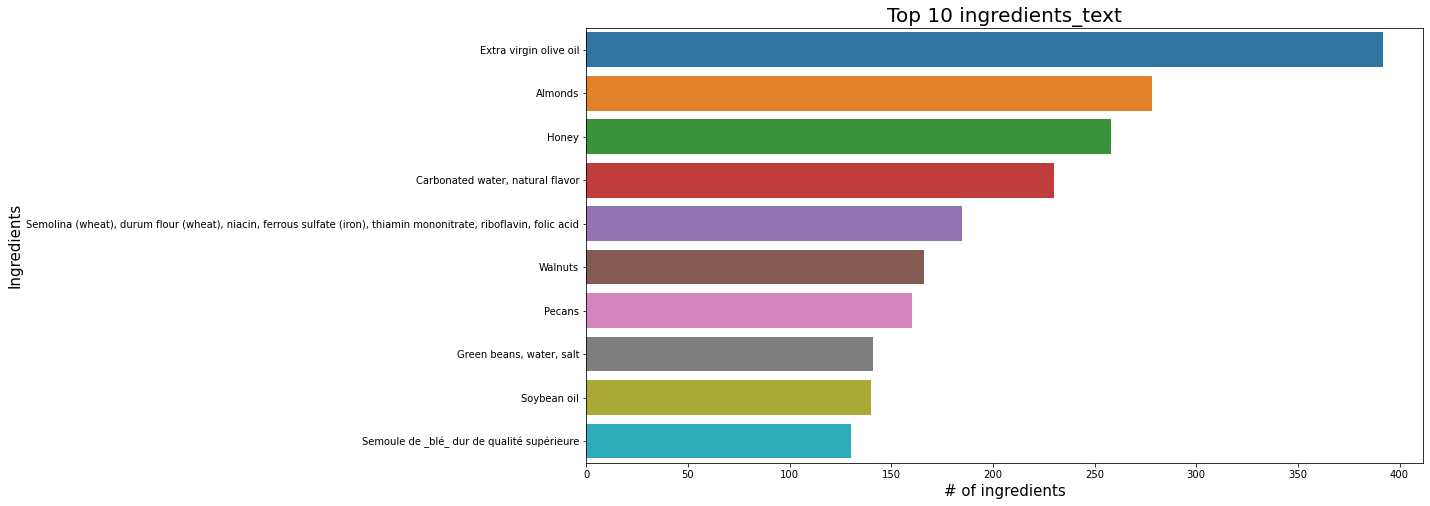

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_selected.ingredients_text.value_counts().head(10), y=df_selected.ingredients_text.value_counts().head(10).index, data=df_selected);
plt.title('Top 10 ingredients_text', fontsize=20);
plt.xlabel('# of ingredients', fontsize=15);
plt.ylabel('Ingredients', fontsize=15);
plt.show();

### Top 10 additives

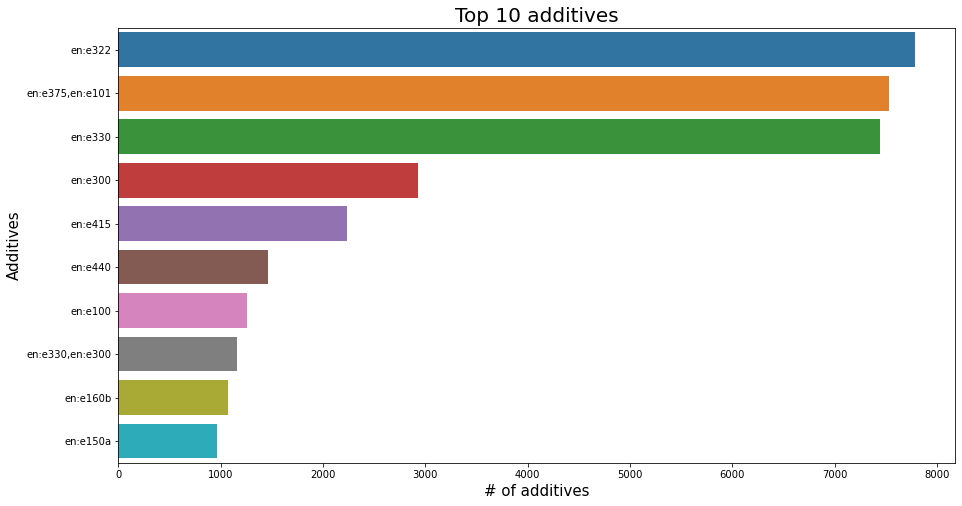

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_selected.additives_tags.value_counts().head(10), y=df_selected.additives_tags.value_counts().head(10).index, data=df_selected);
plt.title('Top 10 additives', fontsize=20);
plt.xlabel('# of additives', fontsize=15);
plt.ylabel('Additives', fontsize=15);
plt.show();

### Top 10 pays

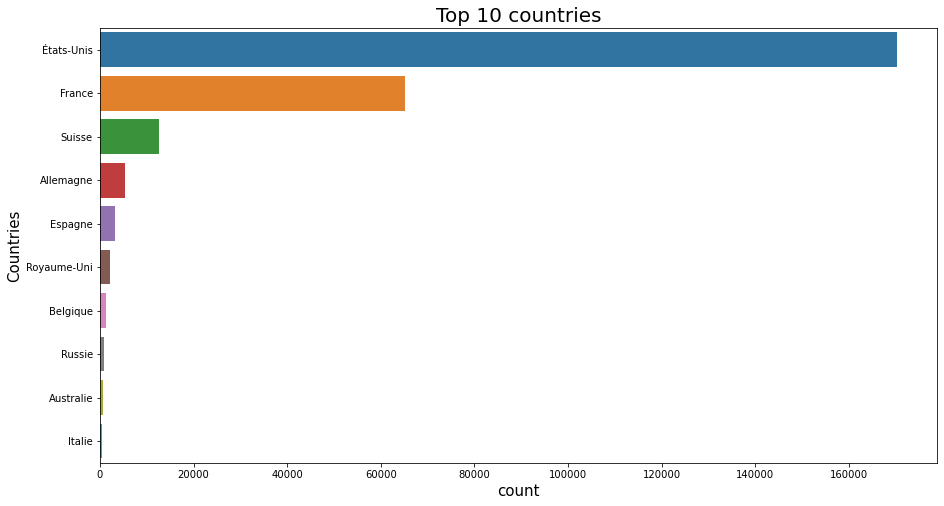

In [46]:
df1 =  df_selected.countries_fr.str.split(',', expand=True).melt(var_name='columns', value_name='values');
df2 = pd.crosstab(index=df1['values'], columns=df1['columns'], margins=True).All.drop('All').sort_values(ascending = False).head(10);
df2 = df2.to_frame();
#Using reset_index, inplace=True
df2.reset_index(inplace=True);

plt.figure(figsize=(15,8));
sns.barplot(y='values', x='All', data=df2);
plt.title('Top 10 countries', fontsize=20);
plt.xlabel('count', fontsize=15);
plt.ylabel('Countries', fontsize=15);
plt.show();

del df1, df2;

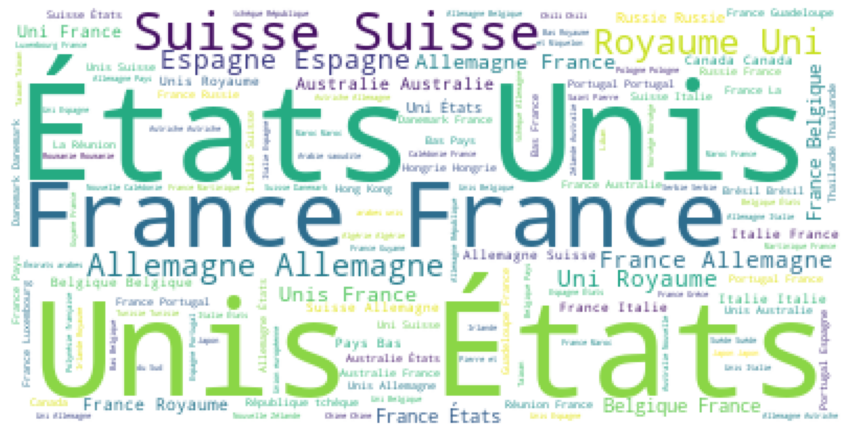

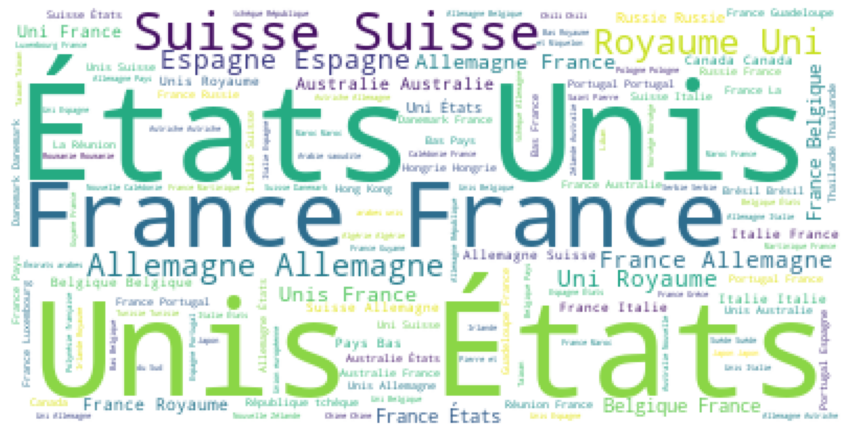

In [47]:
plot_words(df, 'countries_fr')

### Repartition de `nutriscore_grade`

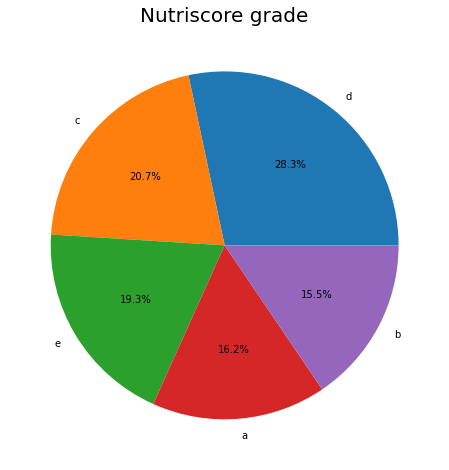

In [48]:
plt.figure(figsize=(15,8))
df_selected.nutrition_grade_fr.value_counts().plot.pie(autopct="%.1f%%");
plt.title('Nutriscore grade', fontsize=20);
plt.ylabel('');

## Analyse bivarié

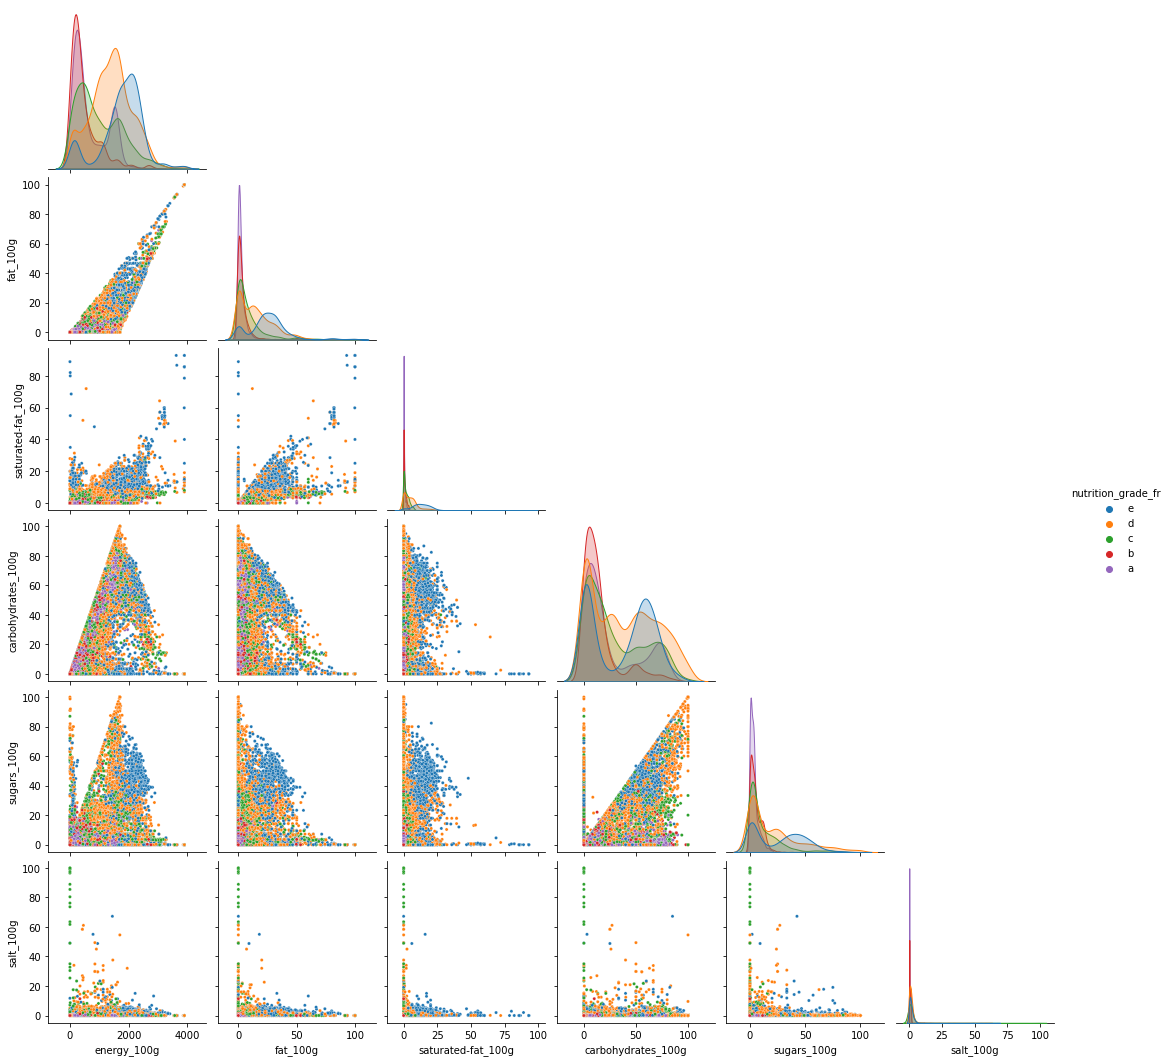

In [49]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
  'salt_100g', 'nutrition_grade_fr']
d = df_selected[(~df_selected['nutrition_grade_fr'].isna()) & (~df_selected['nutrition-score-fr_100g'].isna())][cols].sample(10000)

sns.pairplot(data=d, hue="nutrition_grade_fr", hue_order=['e','d','c','b','a'], 
             plot_kws = {'s': 10}, corner=True)
del d

***Observe:***

The level of fats and that of saturated fats penalizes the nutriscore.  
Other nutrition compositions affects less the nutriscore. However some affectiveness can be observed. This difference can ve due to the the food categories.

Some of foods are rich in caloric energy having a good nutrition grade:
 - A high nutrition grade of 'a' and 'b' with energy in the range of 1500 can be observed with fat smaller then 20
 - A high nutrition grade of 'a' and 'b' with energy in range of 3000 can be observed with very less saturated fat that is less then 10. 
 - We observe foods with rich in carbohidrates that have a good nutrition score having more then 2000 in energy.
 
Theese can be also seen in the folowing 3 figures.

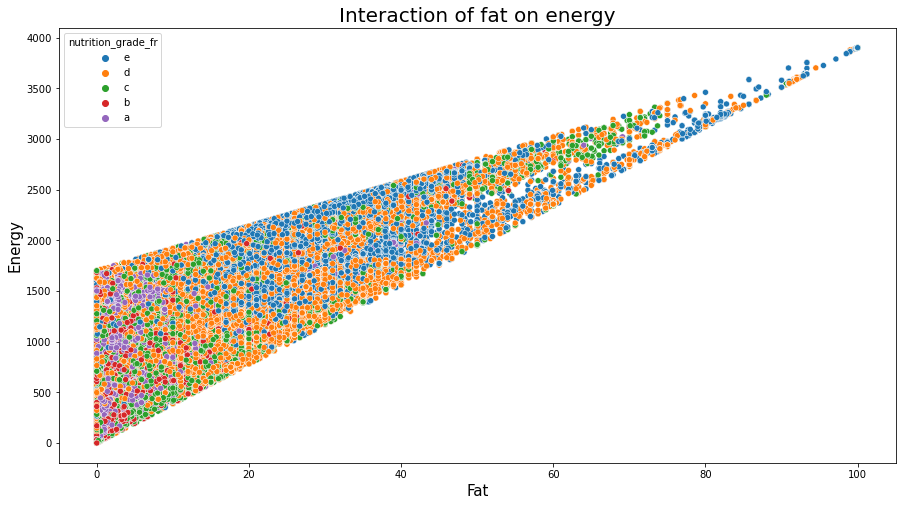

In [50]:
plt.figure(figsize=(15,8));
sns.scatterplot(data=df_selected, x="fat_100g", y="energy_100g", hue="nutrition_grade_fr", hue_order=['e','d','c','b','a'])
plt.title('Interaction of fat on energy', fontsize=20);
plt.xlabel('Fat', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

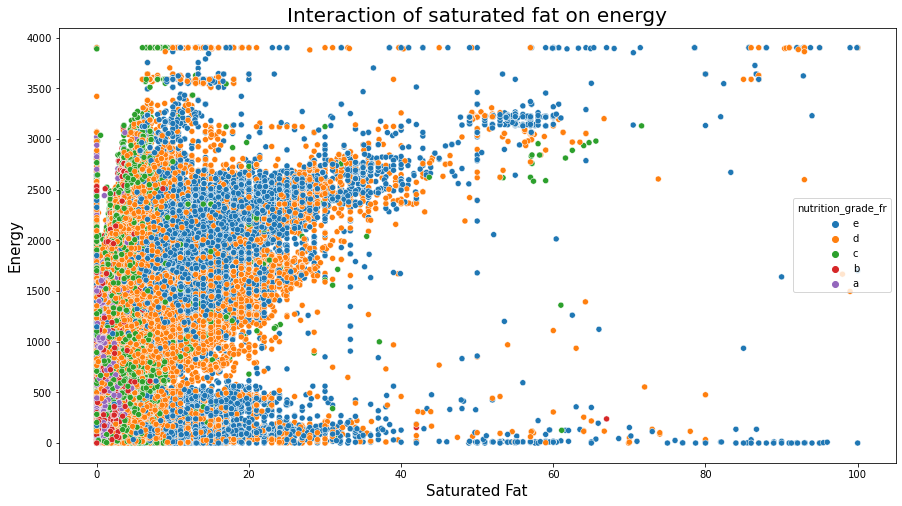

In [51]:
plt.figure(figsize=(15,8));
sns.scatterplot(data=df_selected, x="saturated-fat_100g", y="energy_100g", hue="nutrition_grade_fr", hue_order=['e','d','c','b','a'])
plt.title('Interaction of saturated fat on energy', fontsize=20);
plt.xlabel('Saturated Fat', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

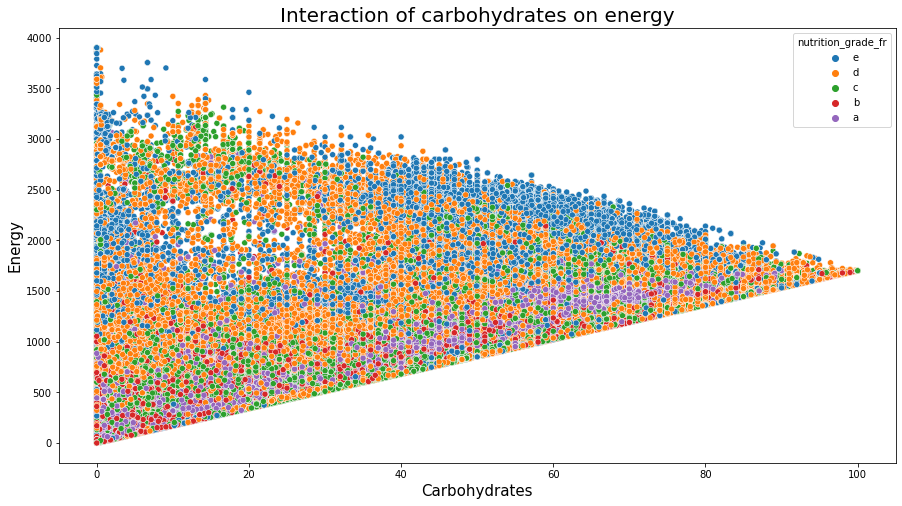

In [52]:
plt.figure(figsize=(15,8));
sns.scatterplot(data=df_selected, x="carbohydrates_100g", y="energy_100g", hue="nutrition_grade_fr", hue_order=['e','d','c','b','a'])
plt.title('Interaction of carbohydrates on energy', fontsize=20);
plt.xlabel('Carbohydrates', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

### Nutrition grade distributions over the `energy_100g` nutrition variable.

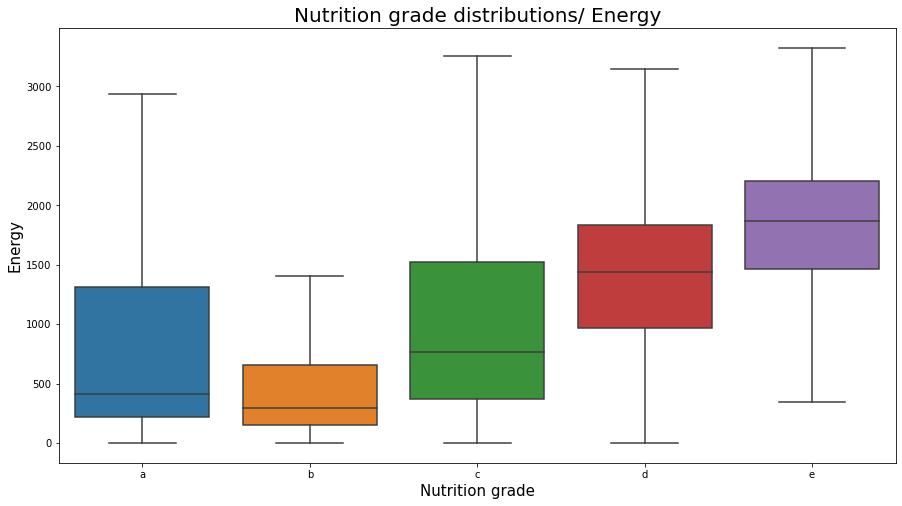

In [53]:
plt.figure(figsize=(15,8));
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df_selected, showfliers = False, order = ['a', 'b', 'c', 'd', 'e'])
plt.title('Nutrition grade distributions/ Energy', fontsize=20);
plt.xlabel('Nutrition grade', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

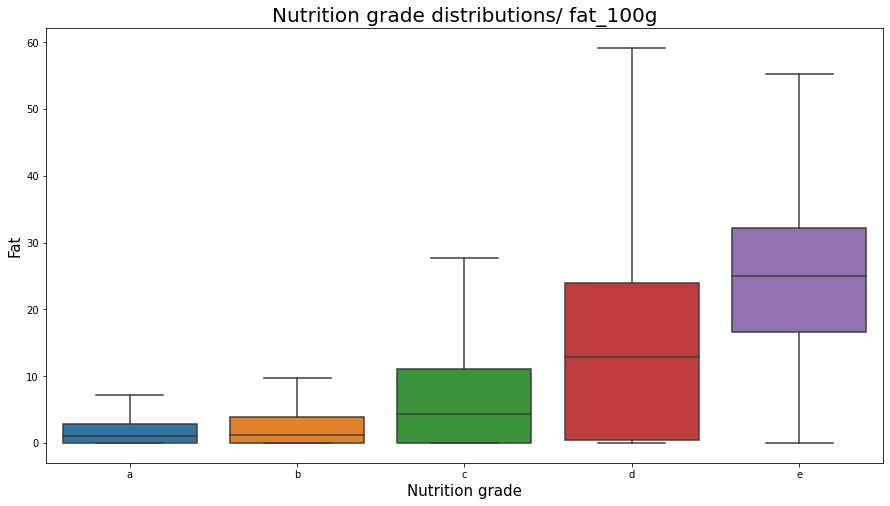

In [54]:
plt.figure(figsize=(15,8));
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df_selected, showfliers = False, order = ['a', 'b', 'c', 'd', 'e'])
plt.title('Nutrition grade distributions/ fat_100g', fontsize=20);
plt.xlabel('Nutrition grade', fontsize=15);
plt.ylabel('Fat', fontsize=15);
plt.show();

Note that all all foods with different nutrition grade can have relatively equal high energies. But prefering good foods (with nutrition grade 'a' and 'b') we are likely to eat foods with less energies. The same thing we observe on fat foods, where preferring better foods (whith a better nutrition score) we shall choose not fat foods.

### Adding a variable containing the categories of foods

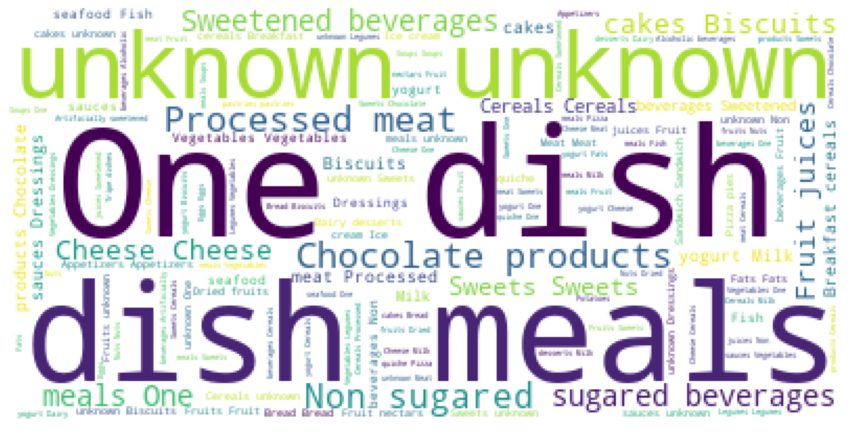

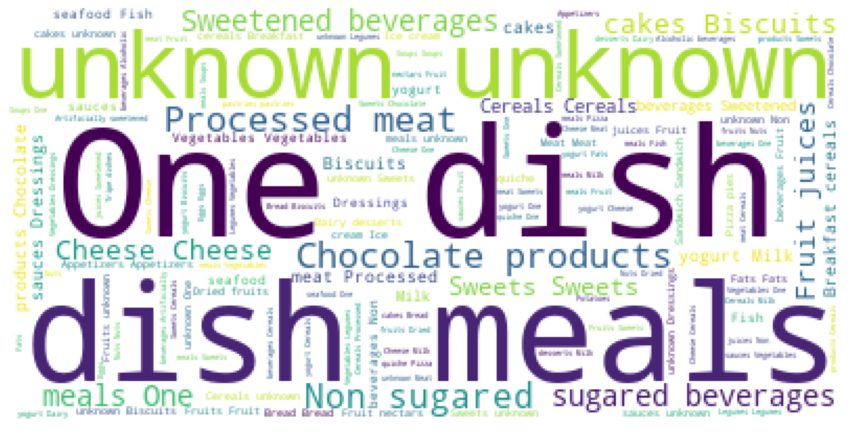

In [55]:
plot_words(df_selected, 'pnns_groups_2')

In [56]:
compute_words_freq(df_selected, 'pnns_groups_2', sep=',')

Word  Frequency
0                            unknown      12835
1                     one-dish meals       4927
2                 biscuits and cakes       4018
3                            cereals       3701
4                             sweets       3587
5                             cheese       3516
6                    milk and yogurt       2914
7               dressings and sauces       2785
8                 chocolate products       2648
9                         vegetables       2585
10                    processed meat       2548
11             non-sugared beverages       2242
12                  fish and seafood       2052
13               sweetened beverages       1952
14                        appetizers       1880
15                      fruit juices       1729
16                             bread       1590
17                              fats       1342
18                 breakfast cereals       1310
19                            fruits       1297
20                              meat       1150
21                           legumes        754
22                    dairy desserts        726
23                         ice cream        647
24                          sandwich        640
25                              nuts        565
26             pizza pies and quiche        464
27                             soups        463
28                      dried fruits        410
29                          pastries        403
30                     fruit nectars        342
31  artificially sweetened beverages        255
32                              eggs        186
33               alcoholic beverages        155
34                          potatoes         96
35                      tripe dishes         49
36          salty and fatty products         19

In [57]:
categories ={
    'cheese' : ['cheese'],
    'appetizer' : ['appetizers', 'nuts', 'salty and fatty products', 'dressings and sauces'],
    'melange': ['soups', 'sandwich', 'pizza pies and quiche'],
    'juice' : ['fruit juices', 'fruit nectars'],
    'plants' : ['legumes', 'legume', 'fruits', 'Fruit', 'vegetables', 'dried fruits'],
    'sweet' : ['sweets', 'biscuits and cakes', 'chocolate products', 'dairy desserts'],
    'feculent' : ['cereals', 'bread', 'pastries', 'potatoes', 'breakfast cereals' ],
    'beverage' : ['non-sugared beverages', 'artificially sweetened beverages', 'alcoholic beverages', 'sweetened beverages'],
    'meat_fish' : ['tripe dishes', 'meat','fish and seafood', 'processed meat', 'eggs'],
    'fats' : ['fats'],
    'milk' : ['milk and yogurt', 'ice cream'],
}
#categories = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in categories.items() ])).melt()
#categories = categories[~categories.value.isna()]

In [58]:
df_selected['my_categoty'] = df_selected['pnns_groups_2'].str.lower();
for new_value, old_value in categories.items():
    df_selected['my_categoty'] = df_selected['my_categoty'].replace([old_value], new_value);

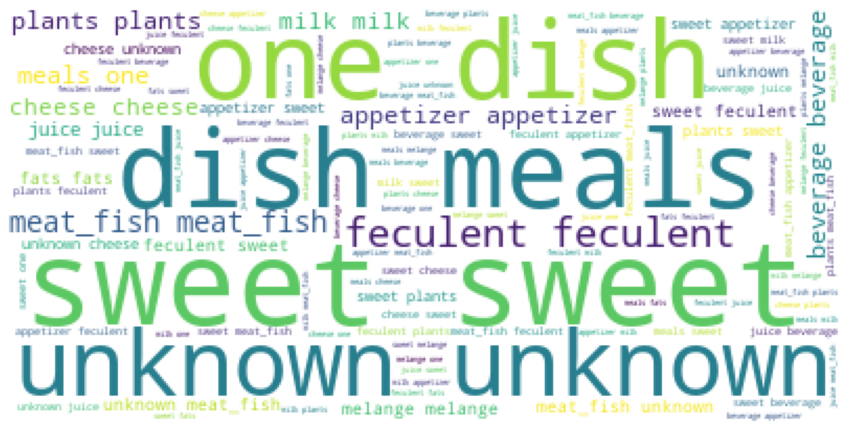

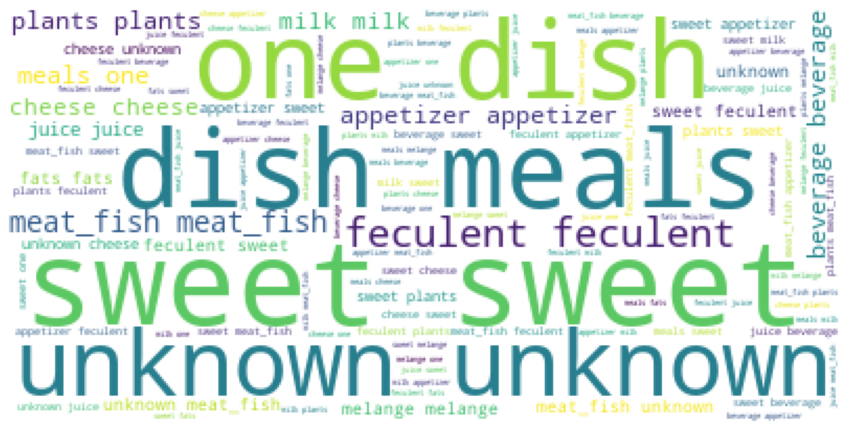

In [59]:
plot_words(df_selected, 'my_categoty')

In [60]:
compute_words_freq(df_selected, 'my_categoty')

Word  Frequency
0     unknown      12835
1       sweet      10979
2    feculent       7100
3   meat_fish       5985
4   appetizer       5249
5      plants       5046
6       meals       4927
7     onedish       4927
8    beverage       4604
9        milk       3561
10     cheese       3516
11      juice       2071
12    melange       1567
13       fats       1342

### Nutrition grade distributions over energy categorized by plants and meat_fish foods

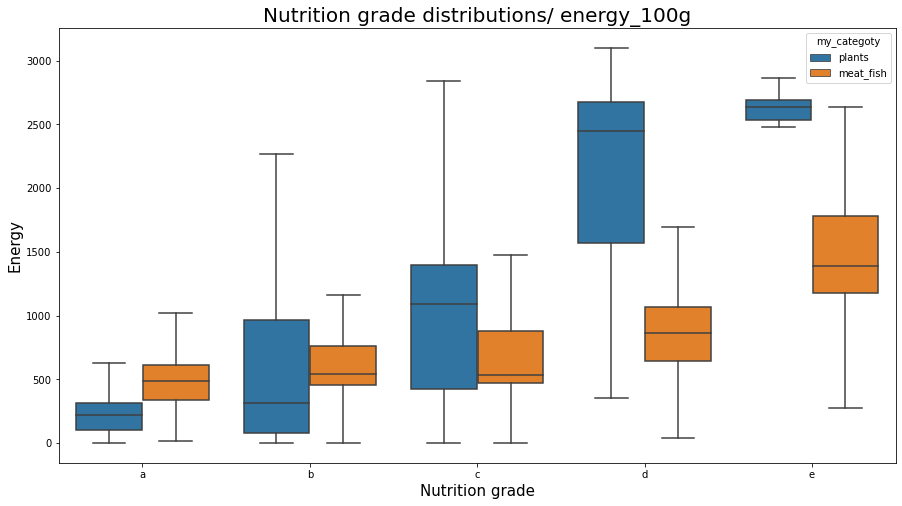

In [61]:
plt.figure(figsize=(15,8));
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df_selected[(df_selected.my_categoty == 'plants') | (df_selected.my_categoty == 'meat_fish')], showfliers = False, order = ['a', 'b', 'c', 'd', 'e'], hue =  'my_categoty')
plt.title('Nutrition grade distributions/ energy_100g', fontsize=20);
plt.xlabel('Nutrition grade', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

### Nutrition grade distributions over energy categorized by beverage and milk foods

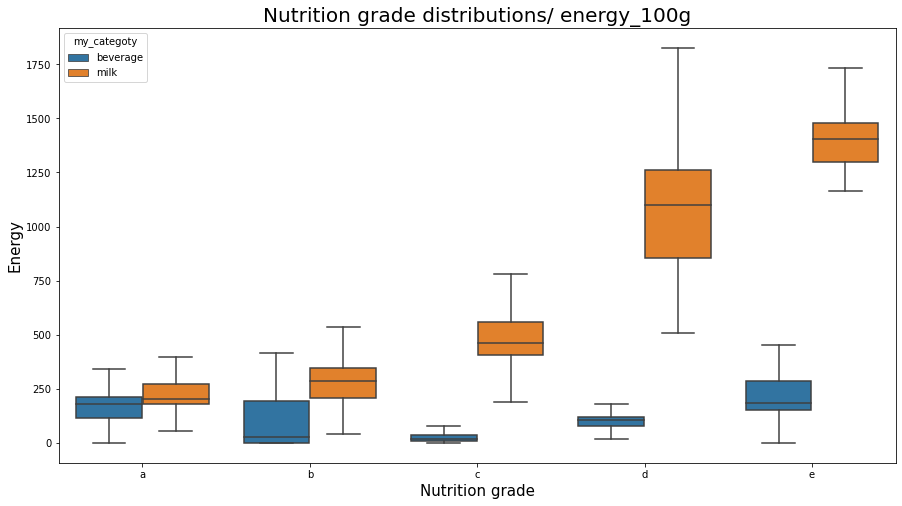

In [62]:
plt.figure(figsize=(15,8));
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df_selected[(df_selected.my_categoty == 'beverage') | (df_selected.my_categoty == 'milk')], showfliers = False, order = ['a', 'b', 'c', 'd', 'e'], hue =  'my_categoty')
plt.title('Nutrition grade distributions/ energy_100g', fontsize=20);
plt.xlabel('Nutrition grade', fontsize=15);
plt.ylabel('Energy', fontsize=15);
plt.show();

### Difference between `nutri-score-fr_100g` and `nutriscore-uk-100g`

/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


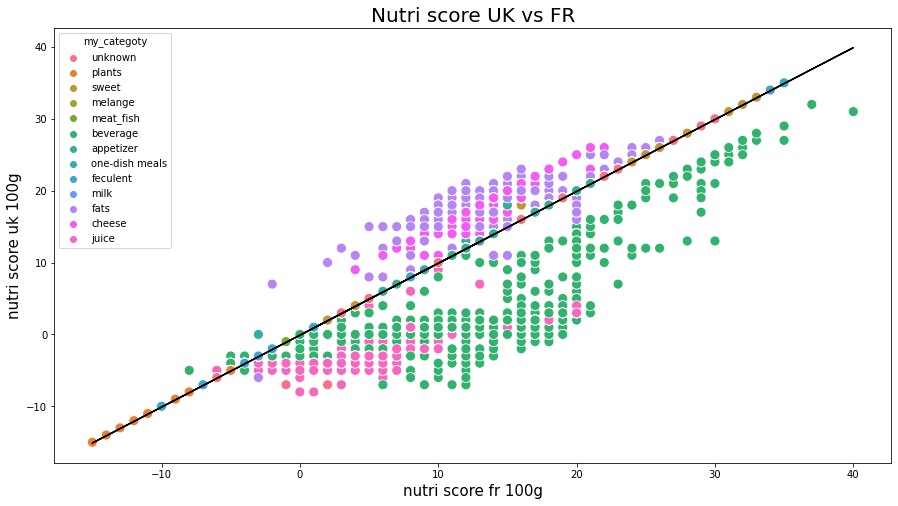

y=ax with a=[1.0000532]
 score : 0.9723672948764118


In [63]:
from sklearn.linear_model import LinearRegression
mask = (~df_selected['nutrition-score-fr_100g'].isna()) & (~df_selected['nutrition-score-uk_100g'].isna())
x=df_selected[mask]['nutrition-score-fr_100g']
y=df_selected[mask]['nutrition-score-uk_100g']

plt.figure(figsize=(15,8));
sns.scatterplot(x, 
                y, 
                hue = df_selected['my_categoty'],
                legend='full',
                s=100);

plt.title('Nutri score UK vs FR', fontsize=20);
plt.xlabel('nutri score fr 100g', fontsize=15);
plt.ylabel('nutri score uk 100g', fontsize=15);


#linear regression
x = np.array(x).reshape(-1, 1);
y = np.array(y).reshape(-1, 1);

reg = LinearRegression();
model = reg.fit(x, y);
plt.plot(x, model.predict(x),color='k');
plt.show()

print('y=ax with a={}\n score : {}'.format(model.coef_[0], model.score(x, y)));

***Nutriscore for the two countries are rather similar, a linear model betweent them is easly modeled. However we see some difference in computation of nutriscore for some categories of ploducts:***
 - beverage are considered with a smaller nutrition score
 - fats are considered with a higher nutrition score
 - cheese are considered with a higher nutrition score

### How much energy for each category of foods?

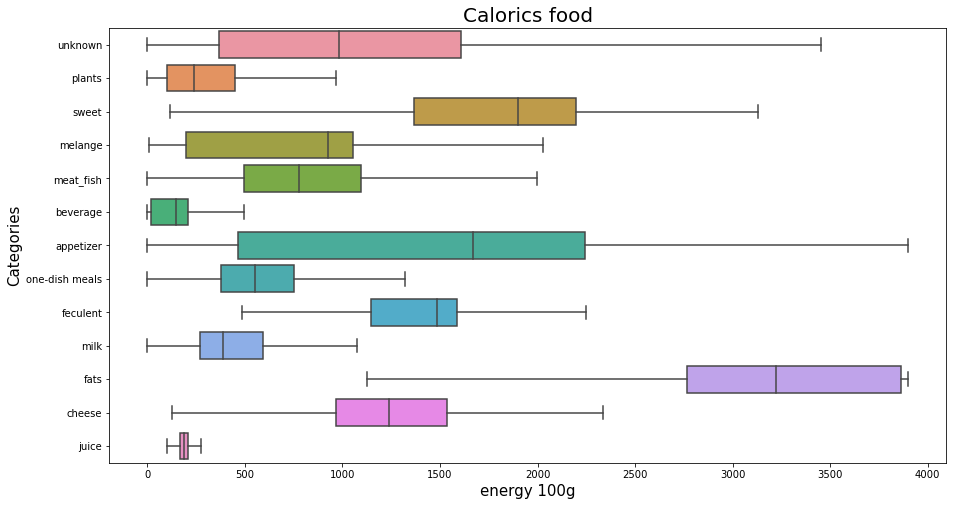

In [64]:
plt.figure(figsize=(15,8));
sns.boxplot(x="energy_100g", y="my_categoty", data=df_selected, orient = 'h', showfliers = False,);
plt.title('Calorics food', fontsize=20);
plt.xlabel('energy 100g', fontsize=15);
plt.ylabel('Categories', fontsize=15);
plt.show();

### How much fat for each category of foods?

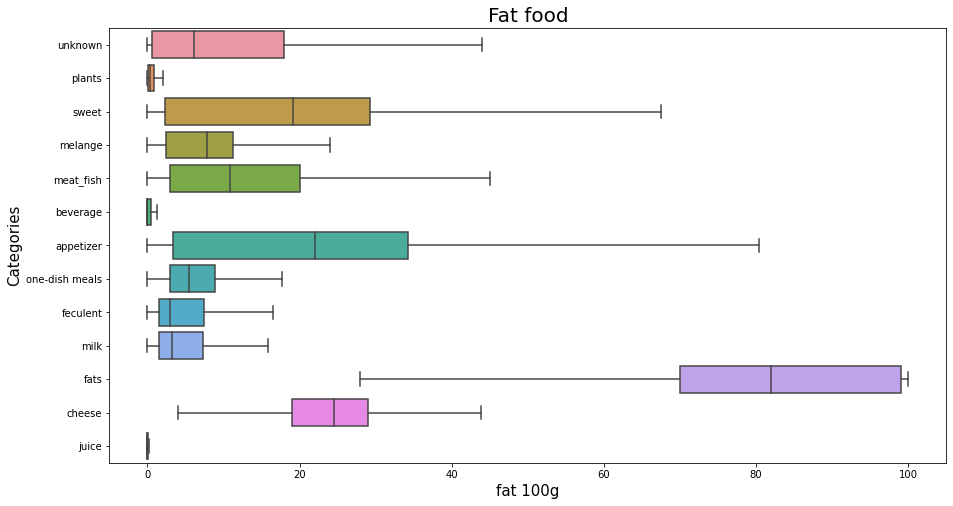

In [65]:
plt.figure(figsize=(15,8));
sns.boxplot(x="fat_100g", y="my_categoty", data=df_selected, orient = 'h', showfliers = False,);
plt.title('Fat food', fontsize=20);
plt.xlabel('fat 100g', fontsize=15);
plt.ylabel('Categories', fontsize=15);
plt.show();

## Faire une analyse exploratoire ACP (multivarié)

***ACP nous permet de:***
   - La variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre individus.
   - Les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?

In [66]:
# selection des colonnes à prendre en compte dans l'ACP
columns_acp = []
for c in list(df_selected.columns):
    if c.endswith('_100g'):
        columns_acp.append(c)
df_pca = df_selected[columns_acp]

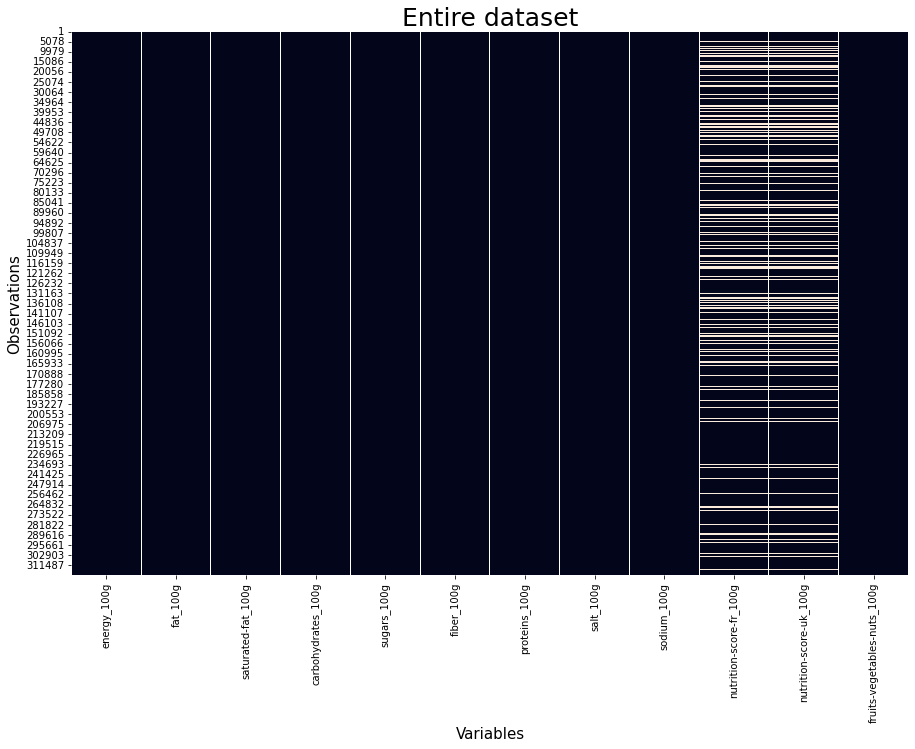

In [67]:
plot_data(df_pca)

In [68]:
# Preparation des données
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean');
X = np.array(df_pca['nutrition-score-fr_100g']).reshape(-1, 1);
imp.fit(X);
df_pca['nutrition-score-fr_100g'] = imp.transform(X);

X = np.array(df_pca['nutrition-score-uk_100g']).reshape(-1, 1);
imp.fit(X);
df_pca['nutrition-score-uk_100g'] = imp.transform(X);
#del X

/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marius/opt/anaconda3/envs/oc3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [69]:
X = df_pca.values
names = df_pca.index #["product_name"] # ou data.index pour avoir les intitulés
features = df_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [70]:
# choix du nombre de composantes à calculer
n_comp = 6

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.fit_transform(X_scaled)


X_projected = pd.DataFrame(X_projected, index = df_pca.index, columns = ['F{0}'.format(i) for i in range(n_comp)])

X_projected

PCA(n_components=6)

F0        F1        F2        F3        F4        F5
1       2.969878 -0.398472  0.512247  0.170433  0.168039 -1.250576
2      -0.119704 -0.925610  0.434700  2.543939  0.046679  0.171516
3       2.309261  0.007418  2.223656  1.584307  0.250097 -0.581340
4       0.002351 -0.753928 -0.451536  1.405344 -0.106914  0.298048
5       0.858225 -0.791237  0.211521  1.907893  0.022654  0.200782
...          ...       ...       ...       ...       ...       ...
320756  0.157600  0.036311  0.451537 -0.319817  0.015153 -1.009554
320757 -1.670609 -0.420981  1.782779  1.898136 -0.025061  1.269749
320763 -2.339713 -0.139322  0.323233 -0.883152 -0.164451 -0.445308
320768 -2.492881 -0.161867  0.332084 -0.887011 -0.164449 -0.535805
320771 -1.512330  0.099590  0.084318 -1.414149 -0.217476 -0.020945

[260767 rows x 6 columns]

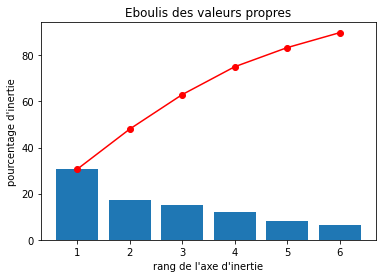

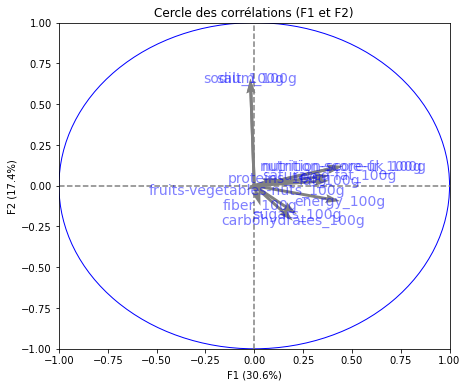

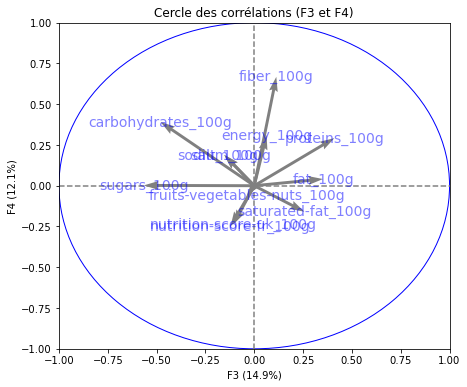

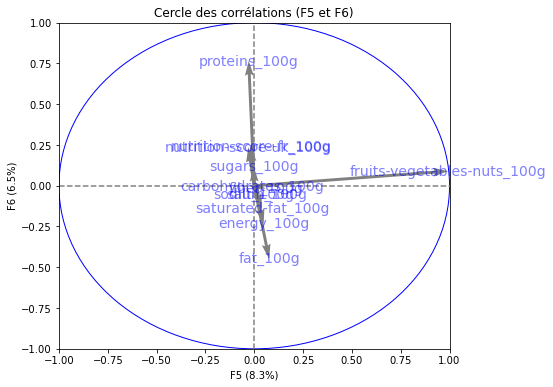

In [71]:
# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

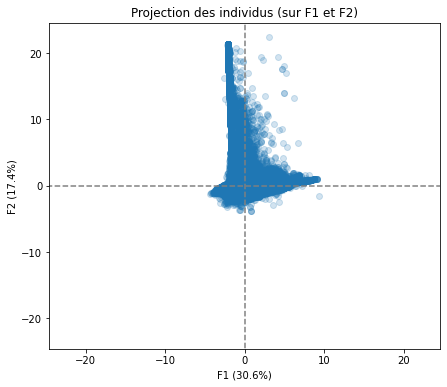

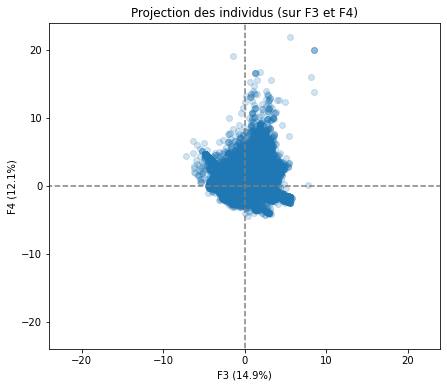

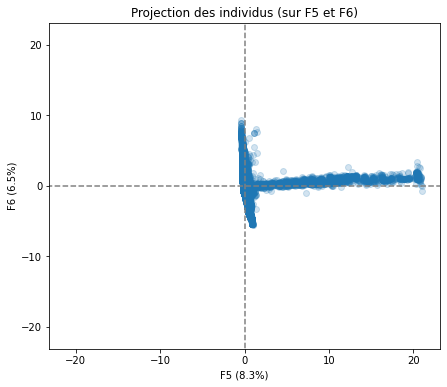

In [72]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.2)

Realizing PCA with 6 composants capturing > then 80% of information.

***Observe:***
Studying the corelation between the initial variables with the obtained principal components we observe. To see that we project the flashes on the axes and obtain the corelation between variables. We can have negative and positive corelations.
 - The variable nutri-score-fr_100g, nutri-score-uk_100g, energy_100g is described by F1.
 - The variable sodium_100g is described by F2.
 - The variable sugars_100g is described by F3.
 - The variable fiber_100g is described by F4.
 - The variable fruits-vegetables-nuts_100g is described by F5.
 - The variable proteins_100g is described by F6.
 
We have also made a projection of individuals.

# K-means algorithm avec ACP

In [73]:
cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g',  'proteins_100g',  'nutrition_grade_fr', 
        'carbohydrates_100g']

df_selected_clustering = df_selected[cols]
df_selected_clustering = df_selected_clustering[~df_selected_clustering.nutrition_grade_fr.isna()]

clusters = df_selected_clustering['nutrition_grade_fr']
clusters = np.array(clusters.apply(lambda x: ord(x)-97)) # transformé en numeric
df_selected_clustering.drop('nutrition_grade_fr', inplace=True, axis=1)

features = df_selected_clustering.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(df_selected_clustering)
df_selected_clustering = std_scale.transform(df_selected_clustering)



In [74]:
n_comp = 2
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(df_selected_clustering)
X_projected = pca.fit_transform(df_selected_clustering)

X_projected# = pd.DataFrame(X_projected, index = df_pca.index, columns = ['F{0}'.format(i) for i in range(n_comp)])

PCA(n_components=2)

array([[ 3.03514692, -0.50058059],
       [ 1.08440559, -0.77137787],
       [ 3.12397384,  0.78626913],
       ...,
       [-0.88462164,  1.63264941],
       [-1.96665734,  0.54173836],
       [-2.02328748,  0.52906735]])

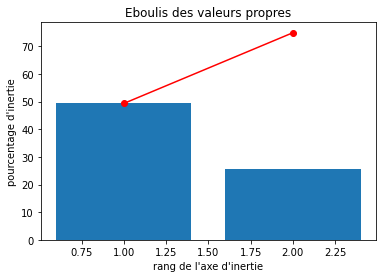

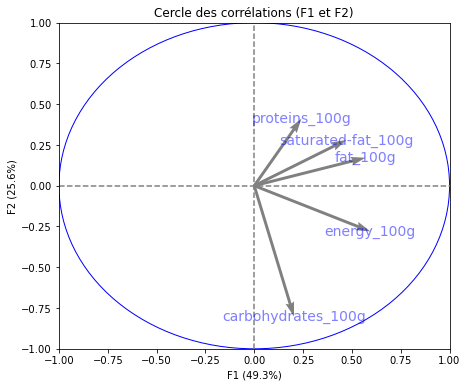

In [75]:
# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics

K = len(np.unique(clusters))
kmeans = KMeans(n_clusters=K).fit(X_projected)

metrics.rand_score(clusters, kmeans.labels_)

0.6878988954016368

# Saving dataset for application

### Getting the data from df_selected maintaining just the values foods category values

In [77]:
df_application = df_selected[~df_selected.my_categoty.isna()].drop(['ingredients_text', 'serving_size', 'additives_tags', 'pnns_groups_2', 'brands'], axis=1).reset_index()

In [78]:
df_application = df_application.drop('index', axis=1)

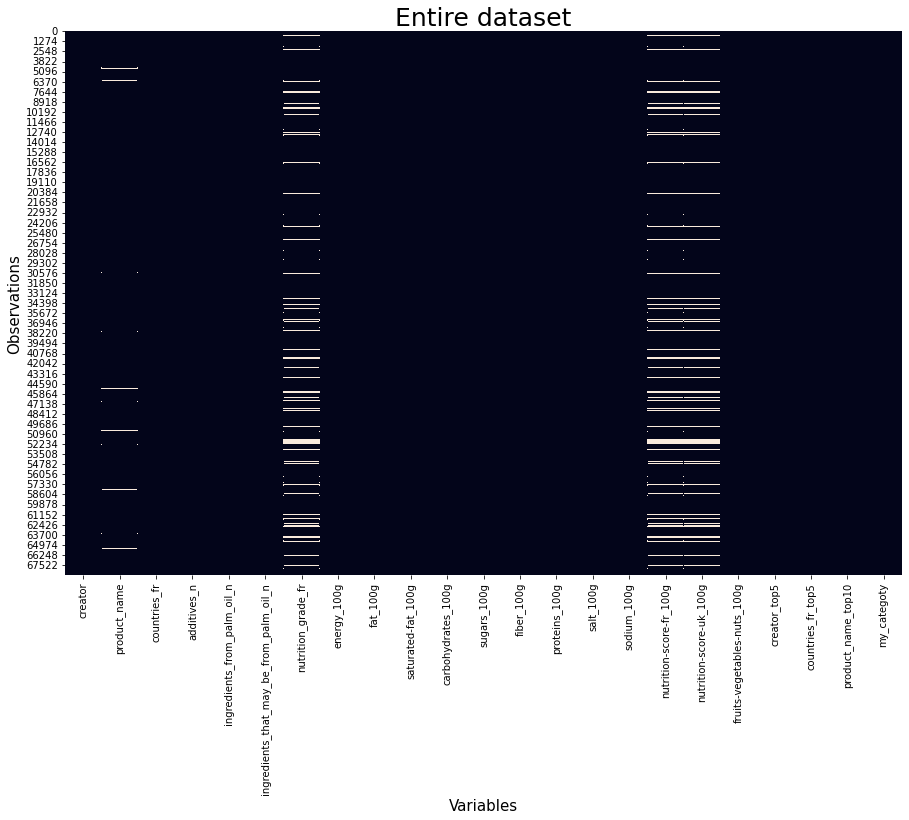

In [79]:
plot_data(df_application)

In [80]:
df_application.head()

creator                    product_name       countries_fr  additives_n  \
0   tacinte                  Lion Peanut x2  France,États-Unis          1.0   
1  teolemon                  Pack de 2 Twix  France,États-Unis          0.0   
2        b7                    Salade Cesar             Canada          0.0   
3        b7  Danoises à la cannelle roulées             Canada         10.0   
4        b7    Chaussons tressés aux pommes             Canada          5.0   

   ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                          0.0                                      0.0   
1                          0.0                                      0.0   
2                          0.0                                      0.0   
3                          0.0                                      1.0   
4                          0.0                                      0.0   

  nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  ...  \
0                  e      2012.50     20.00                12.5  ...   
1                NaN      1579.24      4.17                 0.0  ...   
2                  c      1233.00     12.00                 7.0  ...   
3                NaN      1562.73     14.40                 0.0  ...   
4                  c      1131.81     10.70                 2.0  ...   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  \
0           2.50    0.09652        0.038                     22.0   
1           6.25    0.00000        0.000                      NaN   
2          22.00    2.16000        0.850                      6.0   
3           4.79    0.92200        0.363                      NaN   
4           3.33    0.64700        0.255                      9.0   

   nutrition-score-uk_100g  fruits-vegetables-nuts_100g  creator_top5  \
0                     22.0                          0.0         Autre   
1                      NaN                          0.0         Autre   
2                      6.0                          0.0         Autre   
3                      NaN                          0.0         Autre   
4                      9.0                          0.0         Autre   

   countries_fr_top5  product_name_top10 my_categoty  
0              Autre               Autre     unknown  
1              Autre               Autre     unknown  
2              Autre               Autre      plants  
3              Autre               Autre       sweet  
4              Autre               Autre       sweet  

[5 rows x 23 columns]

### KNN Imputer to fill the nutri score fr/uk

In [81]:
from sklearn.impute import KNNImputer

cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g',  'proteins_100g', 
        'carbohydrates_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']

df_selected_knn = df_application[cols]

imputer = KNNImputer(n_neighbors=5)  # tell the imputer to consider only '#' as missing data
imputed_data = imputer.fit_transform(df_selected_knn)  # impute all '#'
df_selected_knn = pd.DataFrame(data=imputed_data, columns=cols)


df_application['nutrition-score-fr_100g'] = df_selected_knn['nutrition-score-fr_100g']
df_application['nutrition-score-uk_100g'] = df_selected_knn['nutrition-score-uk_100g']

### Fill NaN for the `product_name`

In [82]:
df_application.loc[df_application.product_name.isna(), 'product_name'] = 'unknown'

### Fill NaN for the `nutrition_grade_fr`

In [83]:
df_application['my_categoty'].unique()

array(['unknown', 'plants', 'sweet', 'melange', 'meat_fish', 'beverage',
       'appetizer', 'one-dish meals', 'feculent', 'milk', 'fats',
       'cheese', 'juice'], dtype=object)

In [84]:
not_beverages = ((df_application['my_categoty']!='beverage') & (df_application['my_categoty']!='juice') & (df_application['my_categoty']!='milk'))
beverages = ~not_beverages 
                 
df_application['bevarage'] = beverages

In [85]:
cond1 = (~df_application.bevarage & df_application['nutrition_grade_fr'].isna() & (df_application['nutrition-score-fr_100g'] <= -1))
cond2 = (~df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > -1) & (df_application['nutrition-score-fr_100g'] <= 2)))
cond3 = (~df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > 2) & (df_application['nutrition-score-fr_100g'] <= 10)))
cond4 = (~df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > 10) & (df_application['nutrition-score-fr_100g'] <= 18)))
cond5 = (~df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > 18)))
cond6 = (df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] <= -1)))
cond7 = (df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > -1) & (df_application['nutrition-score-fr_100g'] <= 1)))
cond8 = (df_application.bevarage & df_application['nutrition_grade_fr'].isna() & ((df_application['nutrition-score-fr_100g'] > 1) & (df_application['nutrition-score-fr_100g'] <= 5)))
cond9 = df_application.bevarage & df_application['nutrition_grade_fr'].isna() & (df_application['nutrition-score-fr_100g'] > 5) & (df_application['nutrition-score-fr_100g'] <= 9)
cond10 = df_application.bevarage & df_application['nutrition_grade_fr'].isna() & (df_application['nutrition-score-fr_100g'] > 9)

In [86]:

df_application.loc[cond1, 'nutrition_grade_fr'] = 'a'
df_application.loc[cond2, 'nutrition_grade_fr'] = 'b'
df_application.loc[cond3, 'nutrition_grade_fr'] = 'c'
df_application.loc[cond4, 'nutrition_grade_fr'] = 'd'
df_application.loc[cond5, 'nutrition_grade_fr'] = 'e'

df_application.loc[cond6, 'nutrition_grade_fr'] = 'a'
df_application.loc[cond7, 'nutrition_grade_fr'] = 'b'
df_application.loc[cond8, 'nutrition_grade_fr'] = 'c'
df_application.loc[cond9, 'nutrition_grade_fr'] = 'd'
df_application.loc[cond10, 'nutrition_grade_fr'] = 'e'

In [87]:
df_application.to_csv('data/df_app.csv', index = False, header=True)

In [88]:
df_application[df_application.nutrition_grade_fr.isna()][['nutrition-score-fr_100g', 'bevarage', 'nutrition_grade_fr']]

Empty DataFrame
Columns: [nutrition-score-fr_100g, bevarage, nutrition_grade_fr]
Index: []